In [570]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from keras.utils import np_utils
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
import pprint
from collections import Counter
import re
#from sklearn.utils import shuffle
from gensim.models import Word2Vec
import nltk
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering


## Tiedostojen tiedostonimet

In [680]:
mark1 = 'Adventures of Huckleberry Finn by Mark Twain.txt' #this is the file path to the saved text file
mark2 = 'Life on the Mississippi by Mark Twain.txt' #this is the file path to the saved text file
mark3 = 'The Adventures of Tom Sawyer by Mark Twain.txt' #this is the file path to the saved text file

oscar1 = 'The Happy Prince, and Other Tales by Oscar Wilde.txt' #this is the file path to the saved text file
oscar2 = 'The Importance of Being Earnest A Trivial Comedy for Serious People by Oscar Wilde.txt' #this is the file path to the saved text file
oscar3 = 'The Picture of Dorian Gray by Oscar Wilde.txt' #this is the file path to the saved text file

kirjalista=[mark1,mark2,mark3,oscar1,oscar2,oscar3]

In [681]:
## Merkki määrät kirjoista
for i in range(6):
    text = open(kirjalista[i], encoding="utf-8").read()
    print(len(text))

566407
795221
386670
86728
118517
450301


## Teksti datan lataaminen ja editointi
-pienaakkoset<br>
-pilkkominen sanoihin<br>
-Stemmaaminen<br>
-Sanojen listaus<br>
-filtteröinti

In [712]:
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import *
import re 
nltk.download("stopwords")
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
#from nltk.stem.snowball import SnowballStemmer
import nltk

books_list=[]
# Käy kaikki kirja yksitellen läpi
for i in range (6):
    
    # Avaa kirja
    text = open(kirjalista[i], encoding="utf-8").read()
    
    # Kirjan data pienaakkosiin
    text=text.lower()

    # Pilko data sanoihin
    tk = WordPunctTokenizer() 
    text_tokenized=tk.tokenize(text)

    # Porter Stemmer
    porter = nltk.PorterStemmer()#PorterStemmer()
    stemd_data =[porter.stem(t) for t in text_tokenized]

    # Tee lista kirjan tekstissä esiintyvistä sanoista
    countsT=Counter()
    countsT.update(stemd_data)
    words=sorted(countsT,key=countsT.get,reverse=True)#reverse=True

    # Filteröi kaikki paitsi aakkosmuotoiset sanat
    words = [item for item in words if item.isalpha()]#Poista numerot   
    
    filtered_words=[]
    
    #Poista lopetus sanat
    filtered_words = [w for w in words if not w in stop_words] 

    # Lisää suodatettu lista listaan
    books_list.append(sorted(filtered_words))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yooru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [713]:
#print(words)
for i in range (len(books_list)):
    print(i+1," : ", len(books_list[i]))

1  :  4182
2  :  7432
3  :  4954
4  :  1682
5  :  1894
6  :  4887


## Sanojen vektorisointi

In [719]:
m = Word2Vec(books_list,size=1682,min_count=2,sg=1)
#size = vektorin pituus(vähiten sanoja sisältäneen listan pituus)
#sg=1 ignore kielioppi

#Hae numero muotoinen vektori data Wor2Vector muuttujasta
def vectorisoi(sent,m):
    vec=[]
    numw = 0   
    for w in sent:
        try:
            if numw ==0:
                vec=m[w]
            else:
                vec = np.add(vec, m[w])
            numw+=1
        except:
            pass
            
    #Normalisoi vektorin data jakamalla vektori sanojen määrä / 2000
    return np.asarray(vec)/(numw/2000)

# Luo opetus data
l=[]
for i in stemlist:
    l.append(vectorisoi(i,m))
X=np.array(l)
            

C:\Users\Yooru\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
C:\Users\Yooru\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [720]:
# Printtaa X data
print(X)

[[-0.05300269  0.01391668 -0.0245139  ... -0.00852191 -0.014141
  -0.01940071]
 [-0.05062225  0.0172745  -0.0243464  ... -0.00507817 -0.01257453
  -0.01083271]
 [-0.04948639  0.0153675  -0.02829333 ... -0.00398063 -0.01715179
  -0.00782943]
 [-0.0746822   0.03181595 -0.03780325 ... -0.01259295 -0.02747934
  -0.00772257]
 [-0.06204412  0.03428966 -0.03977831 ... -0.01337997 -0.02057675
  -0.01420361]
 [-0.05378545  0.01675991 -0.02507211 ... -0.00489414 -0.01306588
  -0.0166345 ]]


## Mallinnus

In [721]:
#Klusterien määrä
n_clusters = 2

#Kmeans
clf = KMeans(n_clusters=n_clusters,max_iter=5000,init="k-means++",n_init=1)#init="k-means++",n_init=1

#Klusteroi data
labels=clf.fit_predict(X)

#Printtaa klusterit
print(labels)

[1 1 1 0 0 1]


In [722]:
#Printataan kirjojen klusterointi tulos ja niiden vektorien ensimmäiset 10 sanaa
#Mark 1-3 ja Oscar 1-3

for index, sentence in enumerate(stemlist):
    print(str(labels[index]) + "=" + str(sentence[:10]))

1=['ab', 'abl', 'abner', 'aboard', 'abolitionist', 'abov', 'abram', 'abreast', 'abroad', 'absent']
1=['abandon', 'abdomen', 'abe', 'abid', 'abil', 'abject', 'abl', 'abli', 'abnorm', 'aboard']
1=['abandon', 'abash', 'abid', 'abl', 'ablaz', 'aboard', 'abound', 'abov', 'abreast', 'abroad']
0=['abl', 'abov', 'accid', 'accomplish', 'account', 'across', 'act', 'action', 'actual', 'ad']
0=['aback', 'abandon', 'abl', 'abov', 'abroad', 'absenc', 'absolut', 'abstract', 'absurd', 'absurdli']
1=['abandon', 'abdic', 'abid', 'abject', 'abl', 'abord', 'abov', 'absenc', 'absolut', 'absorb']


blue  =  Mark1
black  =  Mark2
green  =  Mark3
pink  =  Oscar1
brown  =  Oscar2
red  =  Oscar3


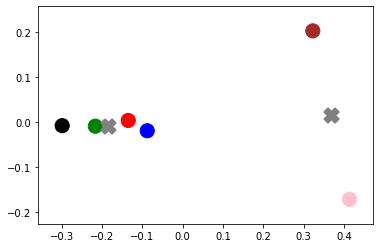

In [723]:
import matplotlib.pyplot as plt

## Plottaa keskittymät ja klusterien keskipisteet
pca=PCA(n_components=2).fit(X)
coords=pca.transform(X)
label_colors = ["blue","black","green","pink","brown","red"]
kirja_label= ["Mark1","Mark2","Mark3","Oscar1","Oscar2","Oscar3"]

colors = [label_colors[i] for i in labels]
plt.scatter(coords[:,0], coords[:,1], c=label_colors,s=200)
centroids= clf.cluster_centers_
centroid_coords = pca.transform(centroids)
plt.scatter(centroid_coords[:,0], centroid_coords[:,1],marker="X",s=200, linewidth=2, c="gray")
plt.show


for i in range(len(label_colors)):
    print(label_colors[i]," = ", kirja_label[i])